# Create plots for logo experiment with distribution discrepency

In [4]:
### Import relevant libraries
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os
import seaborn as sns
import pandas as pd


sim_params = {
        'delete_kernels': False,
        'generate_data': False,
        'data_path': 'logo_data',
        'figures_path': 'figures/new_logo/dist_discrepency',
        'evd_solver': 'arpack',  # 'arpack' / 'randomized' / 'svd'
        'ad_methods': ['lead', 'forward_only', 'ncca', 'nystrom', 'adm_plus', 'backward_only'],
        'seeds': [0, 3, 14, 35, 61, 78, 90, 102, 112, 123],  # use 10 different random seeds
        'embed_dim': 2,
        't': 0,
        'scales': [2, 8, 10, 20],
        'angle_bias_factors': [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2],
        'angles_for_bias': 'common',  # specific1 / specific2 / common
        'im_resize_factor': 1.5,
        'Nr': 100,  # number of samples in the reference set,
        'N': 1000,  # number of total samples
        'valid_size': 0.2,
        'summarize_results': False,
        }

N = sim_params['N']
Nr = sim_params['Nr']
ds_factor = sim_params['im_resize_factor']
results_path = (f'{sim_params["figures_path"]}/N_{N}_ds_factor_{ds_factor}_Nr_{Nr}_bias'
                      f'_{sim_params["angles_for_bias"]}').replace('.', 'p')

In [5]:
# load results
summary_path = f"{results_path}/summary"
results_df = pd.read_csv(f'{results_path}/best_merged.csv')

os.makedirs(summary_path, exist_ok=True)

In [38]:
# format
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # Adjust grid style
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 32
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{newtxmath} \usepackage{newtxtext} \usepackage{newtxtext}'
plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'

font_name = "Times New Roman"  # Change to any other installed serif font if needed

# Set font properties using the font name
font_properties = font_manager.FontProperties(family=font_name, size=20)

In [39]:
reference_methods = ['lead']  # methods for performance reference 
competing_methods = ['nystrom', 'ncca']  # competing methods under the same setting
our_methods = ['forward_only', 'adm_plus']

method_names = {
    'lead': 'LAD',
    'ad': 'ADM',
    'dm': 'DM',
    # 'nystrom': 'Nyström',
    'nystrom': 'Dov et al.',
    'ncca': 'NCCA',
    'kcca': 'KCCA (ChatGPT)',
    'kcca_impute': 'KCCA',
    'forward_only': 'forward only',
    'backward_only': 'backward only',
    'adm_plus': 'ADM+'
}

# Specify the color palette for different methods
palette_reference = {'ad': 'black', 'dm': 'grey', 'lead': 'black'}  # Reference methods: black and grey
palette_our_methods = {'forward_only': 'blue', 'adm_plus': 'dodgerblue', 'backward_only': 'cyan'}  # Our methods in shades of blue
palette_competing = {'nystrom': 'green', 'ncca': 'gold', 'kcca': 'violet', 'kcca_impute': 'purple'}  # Competing methods in other colors

# linestyle
linewidth = 3.5
errorbar = 'se'

# fonts 
legend_fontsize = 26
label_fontsize = 26
tick_fontsize = 32


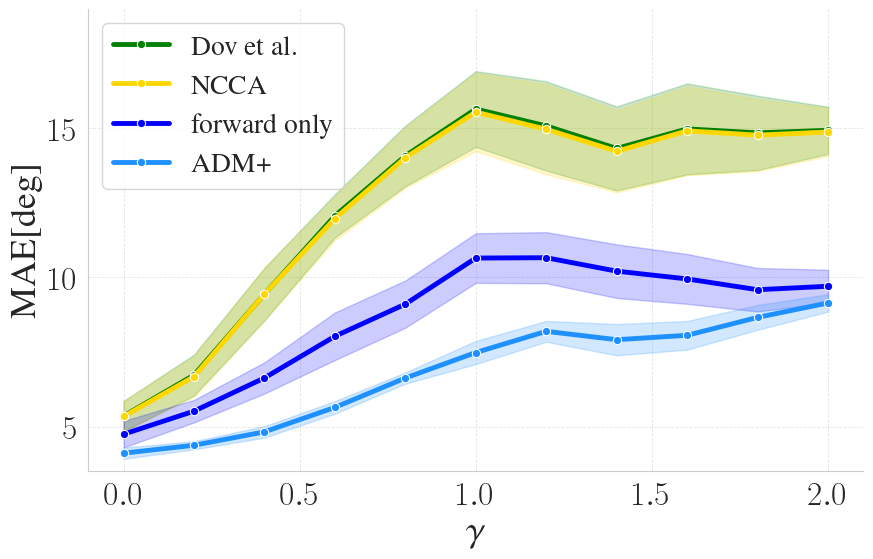

In [44]:
# Filter the dataframe for the current train_percent value and selected methods 
plt.figure(figsize=(10, 6))

# Plot for reference methods with dashed lines
# df_filtered = results_df[results_df['Method'].isin(reference_methods)]
# ax = sns.lineplot(data=df_filtered, x='bias_factor', y=r'MAE', hue='Method',
#                   marker='o', palette=palette_reference, linewidth=linewidth,
#                   hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = results_df[results_df['Method'].isin(competing_methods)] 
ax = sns.lineplot(data=df_filtered, x='bias_factor', y='MAE', hue='Method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = results_df[results_df['Method'].isin(our_methods)]
ax = sns.lineplot(data=df_filtered, x='bias_factor', y='MAE', hue='Method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=26, fontsize=26, loc='upper left', frameon=True, prop=font_properties)

# Enhancing the plot
# plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
# plt.xlabel('Train Size[%]', fontsize=label_fontsize, fontproperties=font_properties)

plt.xlabel(r'$\gamma$', fontsize=label_fontsize)
plt.ylabel(r'MAE[deg]', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([3.5, 19])

# ax.legend().set_visible(True)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.savefig(f'{summary_path}/{sim_params["angles_for_bias"]}_alpha_vs_mae.pdf', dpi=300, format='pdf', bbox_inches='tight')